In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("DATASET.csv")
data.drop(['Unnamed: 0','year','Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36'], axis=1, inplace=True)
data.index+=1
test = data[data.index % 10 == 0]  
test=test.dropna()
x_test=test.iloc[:,0:8]
Y_test=test.iloc[:,8:]

df = data[data.index % 10 != 0]  
df=df.dropna()
pred_df=pd.DataFrame()

In [3]:
j=0
k=0
rmse=0
for i in range(9,900,9):
    x=df.iloc[j:i,:8]
    y=df.iloc[j:i,8:]
    j=i
    #print(y)
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=50)
    reg = ExtraTreesRegressor(n_estimators=1000, random_state=0)#RandomForestRegressor(n_estimators=1000,n_jobs=1) #alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,normalize=False, positive=False, precompute=False, random_state=None,selection='cyclic', tol=0.0001, warm_start=False)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    #print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
    rmse+=np.sqrt(mean_squared_error(y_test, y_pred))*9
    pred=reg.predict(x_test.iloc[k:k+1,:])
    #print(pred)
    pred = pd.DataFrame(pred)
    pred_df=pred_df.append(pred)

    k+=1

In [4]:
print(np.sqrt(rmse/909))

4.929493217975414


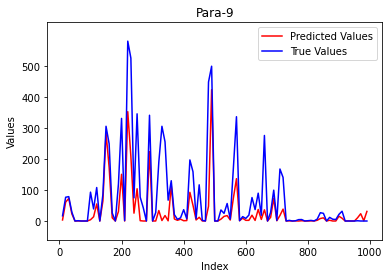

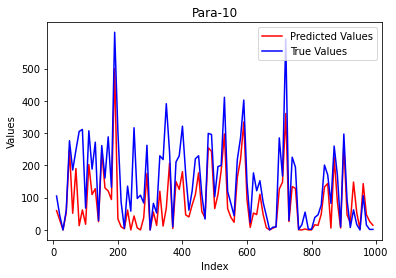

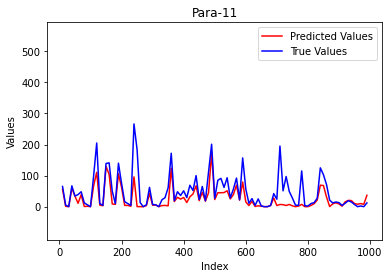

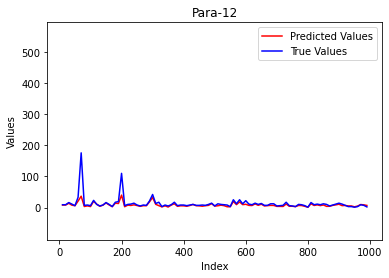

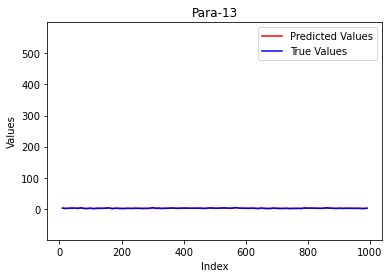

In [5]:
j=0
col=['Para-9','Para-10','Para-11','Para-12','Para-13']
for i in (list(col)):
    pred_df.index=list(range(10,1000,10))
    pred_9=pred_df[j]
    j+=1
    true_9=Y_test[i][0:99]
    plt.plot(pred_9.index,pred_9,color='r')
    plt.plot(true_9.index,true_9,color='b')
    plt.legend(["Predicted Values",'True Values'],loc ="upper right")
    plt.axis('equal')
    plt.yticks(np.arange(0, 600, 100)) 
    plt.xlabel("Index")
    plt.ylabel("Values")
    plt.title(i)
    plt.show()
    